#Assignment 3


#  Data pre-processing


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy
import matplotlib.pyplot as plt
import seaborn as sns

# **Q1**



In [2]:
batch_size = 256
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

# these are 28 x 28 x 1 (grayscale)
trainset = torchvision.datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST('.', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

cpu


100%|██████████| 9912422/9912422 [00:01<00:00, 6766260.07it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 9359166.64it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4206779.86it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13597807.83it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
class Net(nn.Module):
		def __init__(self):
				#TODO: initialize the neural network layers here
				super(Net, self).__init__()
				self.conv = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1, stride=1, bias=True) # 32 * 28 * 28
				self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=1, bias=True)  # 32 * 28 * 28
				self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 32 * 14 * 14
				self.fc = nn.Linear(in_features=(32 * 14 * 14), out_features=128)  # 128
				self.fc_2 = nn.Linear(128, 10)  # 10
            
            
		def forward(self, x):
				#TODO: implement the forward path here)
				x = F.relu(self.conv(x))
				x = F.relu(self.conv_2(x))
				x = self.max_pool(x)
				x = x.view(-1, 32 * 14 * 14)
				x = self.fc(x)
				x = self.fc_2(x)
				return x

In [4]:
@torch.no_grad()
def accuracy(outputs, labels):
		_, preds = torch.max(outputs, dim=1)
		return torch.sum(preds == labels).item() / len(preds)

def train(trainloader, net, optimizer, criterion):
		train_loss = []
		train_acc = []
		for epoch in range(10):
				running_loss = 0.0
				running_acc = 0.0

				for i, (x, labels) in enumerate(trainloader, 0):
					x = x.to(device)
					labels = labels.to(device)
					#TODO: train the net with the given data, optimizer and criterion. 
					optimizer.zero_grad()
					outputs = net(x)
					loss = criterion(outputs, labels)
					loss.backward()
					optimizer.step()

					running_loss += loss.item()
					running_acc += accuracy(outputs, labels)

				average_running_loss = running_loss / len(trainloader)
				average_running_acc = 100 * running_acc / len(trainloader)
				train_loss.append(average_running_loss)
				train_acc.append(average_running_acc)
		return train_loss, train_acc


def test(testloader, net):
		#TODO: Test the net and return a signle test accuracy.
		correct = 0
		with torch.no_grad():
			for data, target in testloader:
				output = net(data)
				pred = output.data.max(1, keepdim=True)[1]
				correct += pred.eq(target.data.view_as(pred)).sum()
		test_acc = 100. * correct / len(testloader.dataset)
		print(f'Accuracy of the network on the test set: {test_acc:.1f} %')
		return test_acc

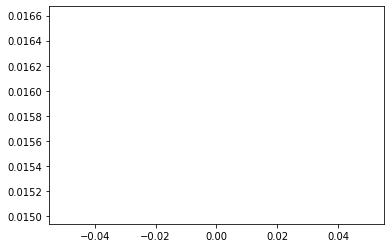

In [6]:
#TODO: Train the net with Adam optimizer. 
net = Net()
optimizer = torch.optim.Adam(net.parameters(), 0.001)
criterion = nn.CrossEntropyLoss()

loss, acc = train(trainloader, net, optimizer, criterion)


[92.15480939716313, 97.96653368794325, 98.51673315602835, 98.76329787234043, 99.05418882978724, 99.17553191489361, 99.28357712765957, 99.38996010638297, 99.46531471631207, 99.45367907801419]
Accuracy of the network on the test set: 98.8 %


tensor(98.7600)

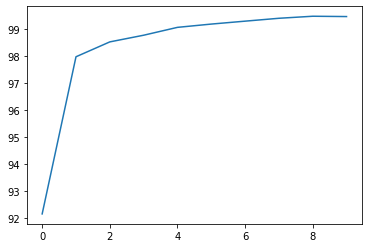

In [9]:
plt.plot([x for x in range(10)], acc)
print(acc)
test(testloader, net)

# **Q3**


In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

import time

Width=427, Height=640, Depth=3
In 2-D the shape is  (273280, 3)


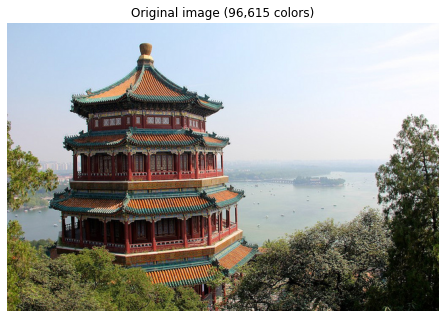

In [8]:
china_photo = datasets.load_sample_image("china.jpg")
china_photo = np.array(china_photo, dtype=np.float64) / 255
china_w, china_h, china_d = tuple(china_photo.shape)
print("Width=%s, Height=%s, Depth=%s" % (china_w, china_h, china_d))
china_image_array = np.reshape(china_photo, (china_w * china_h, china_d))
print("In 2-D the shape is ", china_image_array.shape)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the codebook and labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
          #TODO: reconstruct the image
          image[i][j] = codebook[labels[label_idx]]
          label_idx += 1
    return image

plt.figure()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china_photo)

Handling k = 2
Handling k = 4
Handling k = 8
Handling k = 16


<Figure size 432x288 with 0 Axes>

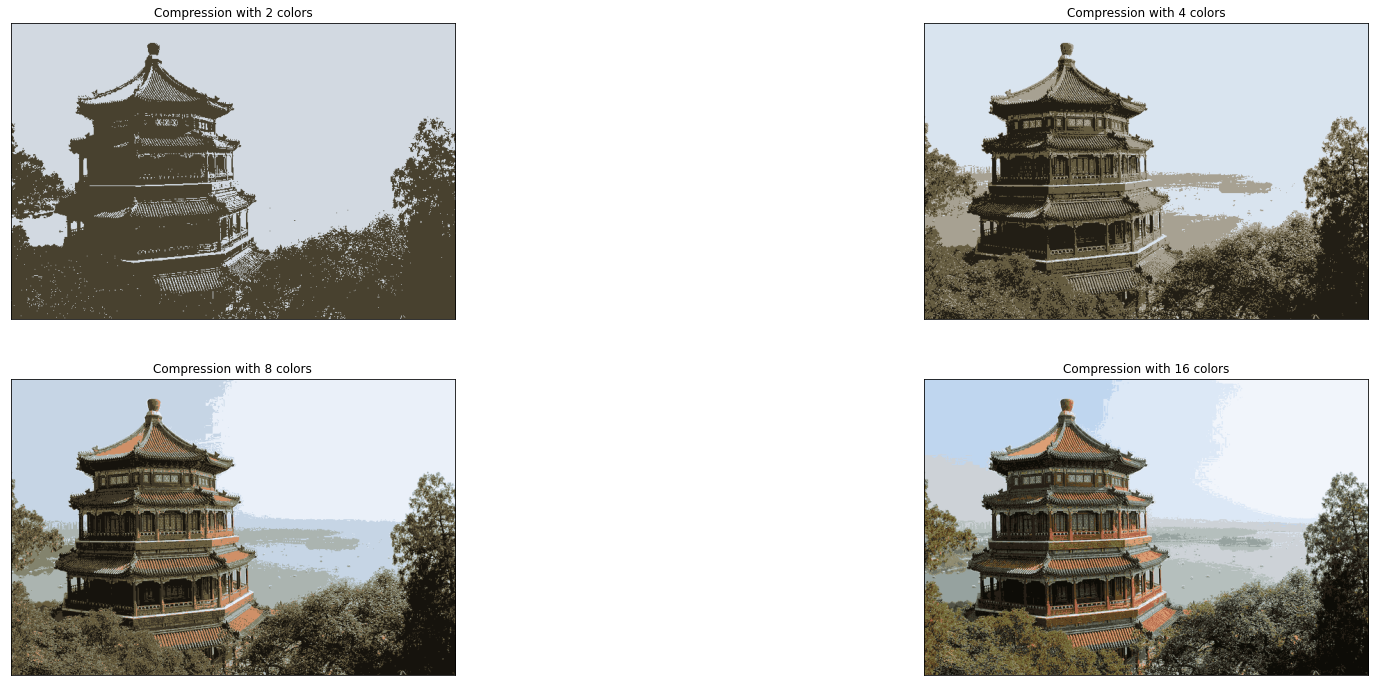

In [26]:
plt.figure()
fig, axes = plt.subplots(2, 2, figsize=(30,12))

#the 2d is for convenience
t1h_k_values = [[8, 16], [32, 64]]
for i in range(2):
		for j in range(2):
				print("Handling k =", t1h_k_values[i][j])

				#TODO: call Kmeans with k=t1h_k_values[i][j] and random_state = 1234
				t1h_kmeans_obj = KMeans(n_clusters=t1h_k_values[i][j], random_state=0).fit(china_image_array)
				#TODO: fit the object with china image array variable
				t1h_kmeans_fit = t1h_kmeans_obj.predict(china_image_array)

				img = recreate_image(t1h_kmeans_obj.cluster_centers_, t1h_kmeans_fit, china_w, china_h)
				# for x in range(img.shape[0]):
				# 		for y in range(img.shape[1]):
				# 				img[x][y] = [0, 0, 0]
				axes[i][j].imshow(img)
				axes[i][j].set_title('Compression with ' + str(t1h_k_values[i][j]) + " colors")
				
				axes[i][j].grid(False)
				axes[i][j].get_xaxis().set_ticks([])
				axes[i][j].get_yaxis().set_ticks([])
plt.savefig('foo.png')